# 지역 별 판매 실적 분석

Region 별로 구분하여 판매한 Units를 확인할 수 있는 Box Plot을 만들어라.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# from numpy import NaN, NAN, nan

data_sales = pd.read_csv('../data_visual/data_officesupplies.csv')
print(type(data_sales))
print(data_sales.head())
print(data_sales.columns)

<class 'pandas.core.frame.DataFrame'>
     OrderDate   Region      Rep     Item  Units  Unit Price
0   4-Jul-2014     East  Richard  Pen Set     62        4.99
1  12-Jul-2014     East     Nick   Binder     29        1.99
2  21-Jul-2014  Central   Morgan  Pen Set     55       12.49
3  29-Jul-2014     East    Susan   Binder     81       19.99
4   7-Aug-2014  Central  Matthew  Pen Set     42       23.95
Index(['OrderDate', 'Region', 'Rep', 'Item', 'Units', 'Unit Price'], dtype='object')


In [2]:
# 지역 별 평균 판매 개수 확인
# 데이터를 그룹화하여 지역 별 평균 판매량 확인

groupby_sales = data_sales.groupby('Region')['Units'].mean()
print(type(groupby_sales))
print(groupby_sales)

<class 'pandas.core.series.Series'>
Region
Central    49.958333
East       53.153846
West       38.500000
Name: Units, dtype: float64


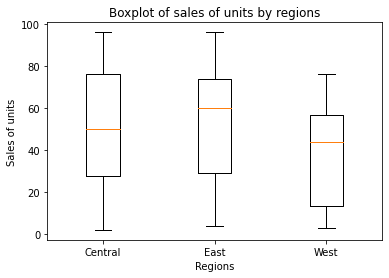

In [3]:
boxplot = plt.figure()
ax1 = boxplot.add_subplot(1,1,1)

ax1.boxplot([data_sales[data_sales['Region']=='Central']['Units'],
            data_sales[data_sales['Region']=='East']['Units'],
            data_sales[data_sales['Region']=='West']['Units']],
            labels = ['Central', 'East', 'West'])
ax1.set_xlabel("Regions")
ax1.set_ylabel("Sales of units")      
ax1.set_title("Boxplot of sales of units by regions")
plt.show()

지역 별 판매 개수의 양을 보면 East 지역이 중앙값과 3사분위가 가장 높고 1사분위도 근소한 차이로 Central 지역보다 낮다.

또한 위에 확인한 지역 별 평균 판매량도 East 지역이 53.15개로 가장 높았다.

반면 West 지역은 평균 구매량이나 1사분위, 중앙값, 3사분위 모두 낮았다.

Central 지역은 1사분위의 구매량은 East 지역보다 근소한 차이로 높고, 3사분위의 구매량은 근소한 차이로 낮았다. 그런 반면 중앙값이 East 지역과 유의미한 차이를 보였다. 

Central 지역의 평균 판매량은 49.95개로 East 지역보다 3개 가량 적었다.


**따라서, East > Central > West 지역 순으로 판매량이 차이가 난다고 할 수 있다.**

*그렇다면 총 판매량은 어떨까? 과연 그것도 East 지역이 가장 높을까?*

In [4]:
# 판매량과 단위 가격을 합쳐서 새로운 column, 총 판매량(total_sales)를 만들었다.

data_sales['total_sales'] = (data_sales['Units'] * data_sales['Unit Price'])
print(data_sales.head())

     OrderDate   Region      Rep     Item  Units  Unit Price  total_sales
0   4-Jul-2014     East  Richard  Pen Set     62        4.99       309.38
1  12-Jul-2014     East     Nick   Binder     29        1.99        57.71
2  21-Jul-2014  Central   Morgan  Pen Set     55       12.49       686.95
3  29-Jul-2014     East    Susan   Binder     81       19.99      1619.19
4   7-Aug-2014  Central  Matthew  Pen Set     42       23.95      1005.90


In [5]:
# 지역 별 총 판매량 확인

groupby_sales = data_sales.groupby('Region')['total_sales'].mean()
print(type(groupby_sales))
print(groupby_sales)

<class 'pandas.core.series.Series'>
Region
Central    464.127917
East       461.699231
West       414.453333
Name: total_sales, dtype: float64


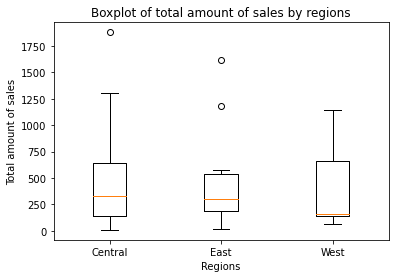

In [6]:
boxplot = plt.figure()
ax1 = boxplot.add_subplot(1,1,1)

ax1.boxplot([data_sales[data_sales['Region']=='Central']['total_sales'],
            data_sales[data_sales['Region']=='East']['total_sales'],
            data_sales[data_sales['Region']=='West']['total_sales']],
            labels = ['Central', 'East', 'West'])
ax1.set_xlabel("Regions")
ax1.set_ylabel("Total amount of sales")      
ax1.set_title("Boxplot of total amount of sales by regions")
plt.show()

총 판매량의 경우 다른 경우가 나왔다.

지역 별 총 판매량의 평균은 Central 464.12, East 461.70, West 414.45로 Central 지역이 East 지역보다 높고 West 지역이 가장 낮았다.

Outlier를 제외한 박스 그래프에서 West 지역의 1사분위의 경우 다른 두 지역보다 높았지만, 판매 수익의 중앙값이 매우 낮았다.

반면 Central 지역과 East 지역은 모두 엇비슷한 수준의 판매량의 중앙값을 지녔고 제1사분위의 경우 Central 지역이 더 높았다.

**결론 : 지역 별 판매 개수만 봤을 때는 East 지역이 가장 많이 팔리는 지역처럼 보였지만, 총 판매 수익을 확인해보니 Central 지역이 오히려 근소하게나마 더 수익성있는 지역이었음을 확인할 수 있었다.**